# Data Loading 

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('Coffee Shop Sales.xlsx')

# Initial Inspection

In [3]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
columns = list(data.columns)
columns

['transaction_id',
 'transaction_date',
 'transaction_time',
 'transaction_qty',
 'store_id',
 'store_location',
 'product_id',
 'unit_price',
 'product_category',
 'product_type',
 'product_detail']

In [5]:
data.shape

(149116, 11)

# Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [7]:
data.describe().round(2)

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.00,149116,149116.00,149116.00,149116.00,149116.00
mean,74737.37,2023-04-15 11:50:32.173609984,1.44,5.34,47.92,3.38
min,1.00,2023-01-01 00:00:00,1.00,3.00,1.00,0.80
25%,37335.75,2023-03-06 00:00:00,1.00,3.00,33.00,2.50
50%,74727.50,2023-04-24 00:00:00,1.00,5.00,47.00,3.00
75%,112094.25,2023-05-30 00:00:00,2.00,8.00,60.00,3.75
max,149456.00,2023-06-30 00:00:00,8.00,8.00,87.00,45.00
std,43153.60,NaN,0.54,2.07,17.93,2.66


In [8]:
data.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [9]:
data.duplicated().any()

False

# Standradize Data  Format

In [10]:
pd.to_datetime(data['transaction_date'])
data['month'] = data['transaction_date'].dt.month_name()
data['day'] = data['transaction_date'].dt.day_name()
data["year"] = data["transaction_date"].dt.year

In [11]:
# Convert transaction_time to datetime
data['transaction_time'] = pd.to_datetime(data['transaction_time'], format='%H:%M:%S').dt.time
data['hour'] = pd.to_datetime(data['transaction_time'], format='%H:%M:%S').dt.hour

In [12]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month,day,year,hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,January,Sunday,2023,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,Sunday,2023,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,January,Sunday,2023,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,January,Sunday,2023,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,Sunday,2023,7


# Profit/Loss Analysis 

## Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data['total_sales'] = data['transaction_qty'] * data['unit_price']

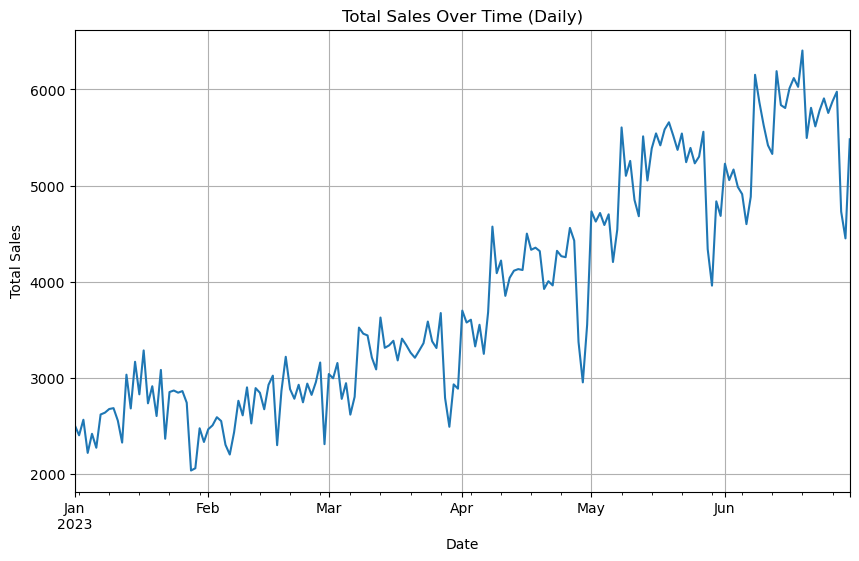

In [15]:
# Plot 1: Total Sales Over Time (Daily)
plt.figure(figsize=(10, 6))
data.groupby('transaction_date')['total_sales'].sum().plot()
plt.title('Total Sales Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

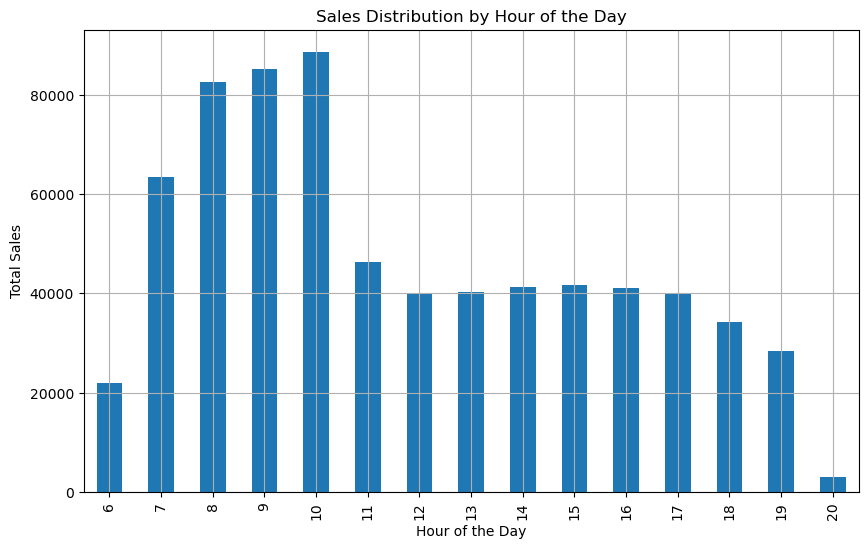

In [16]:
# Plot 2: Sales Distribution by Hour of the Day
plt.figure(figsize=(10, 6))
data.groupby('hour')['total_sales'].sum().plot(kind='bar')
plt.title('Sales Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

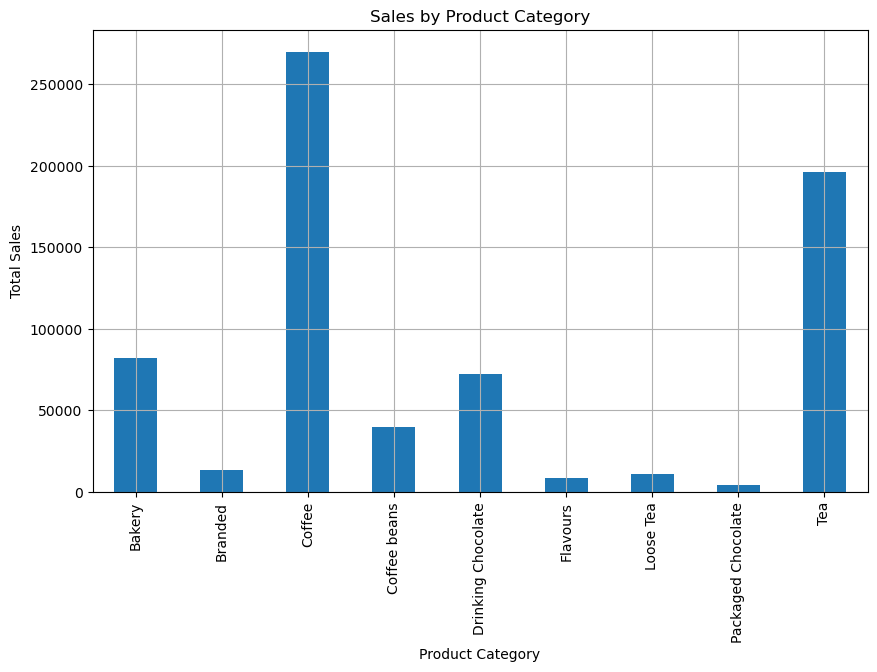

In [17]:
# Plot 3: Sales by Product Category
plt.figure(figsize=(10, 6))
data.groupby('product_category')['total_sales'].sum().plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

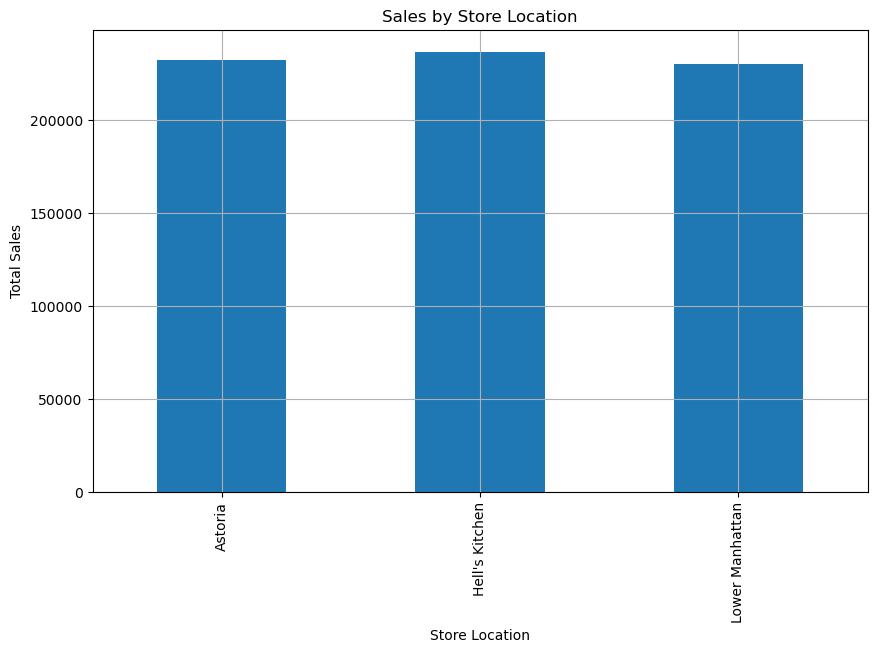

In [18]:
# Plot 4: Sales by Store Location
plt.figure(figsize=(10, 6))
data.groupby('store_location')['total_sales'].sum().plot(kind='bar')
plt.title('Sales by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

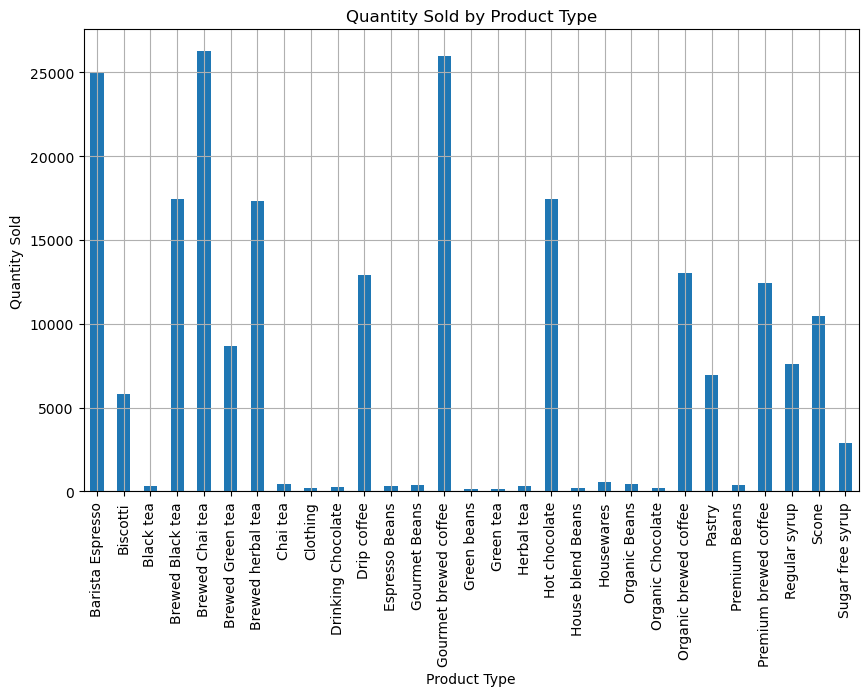

In [19]:
# Plot 5: Quantity Sold by Product Type
plt.figure(figsize=(10, 6))
data.groupby('product_type')['transaction_qty'].sum().plot(kind='bar')
plt.title('Quantity Sold by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

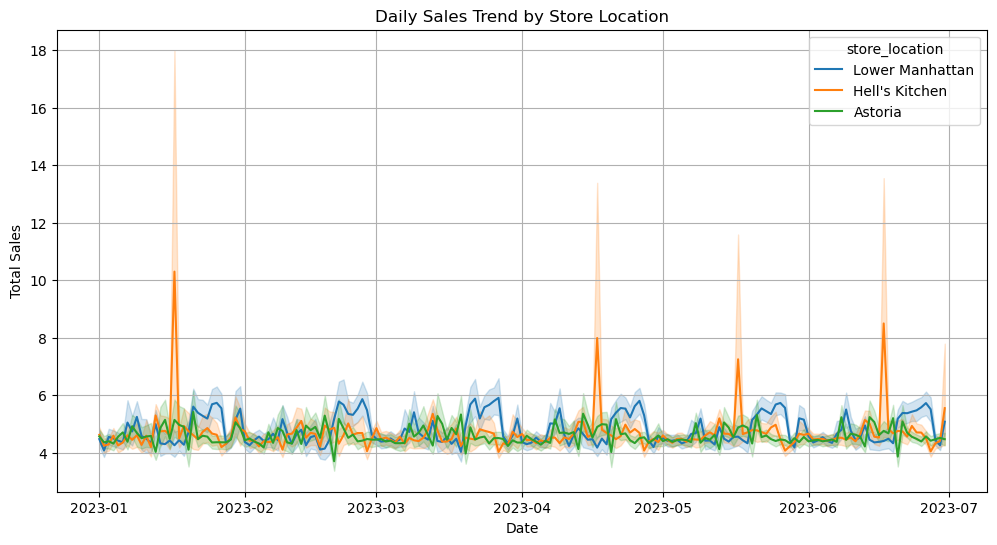

In [20]:
# Plot 6: Daily Sales Trend by Store Location
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='transaction_date', y='total_sales', hue='store_location')
plt.title('Daily Sales Trend by Store Location')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

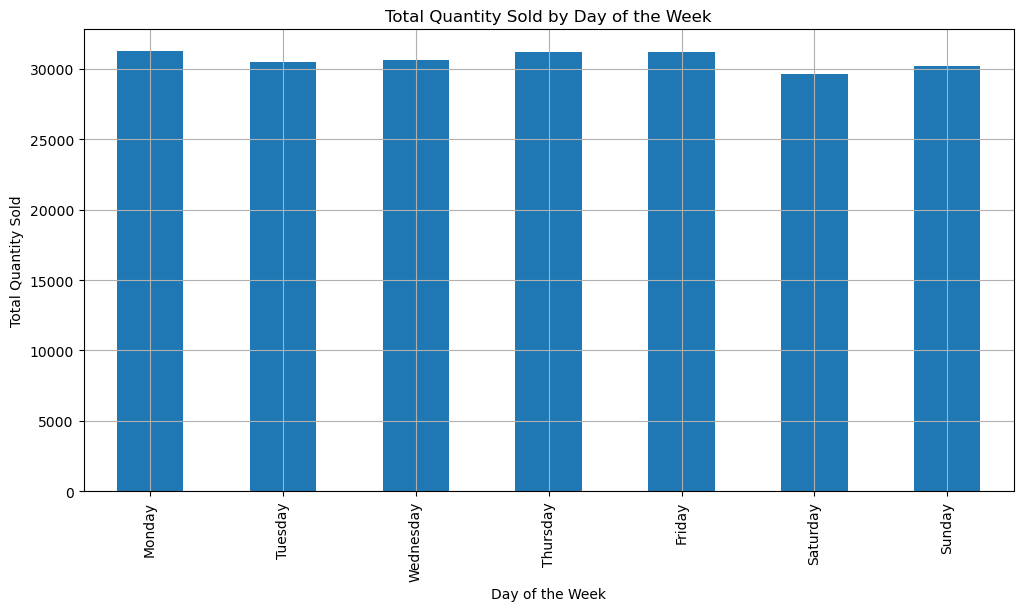

In [21]:
# Plot 8: Total Quantity Sold by Day of the Week
plt.figure(figsize=(12, 6))
total_qty_by_day = data.groupby('day')['transaction_qty'].sum()
total_qty_by_day = total_qty_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
total_qty_by_day.plot(kind='bar')
plt.title('Total Quantity Sold by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

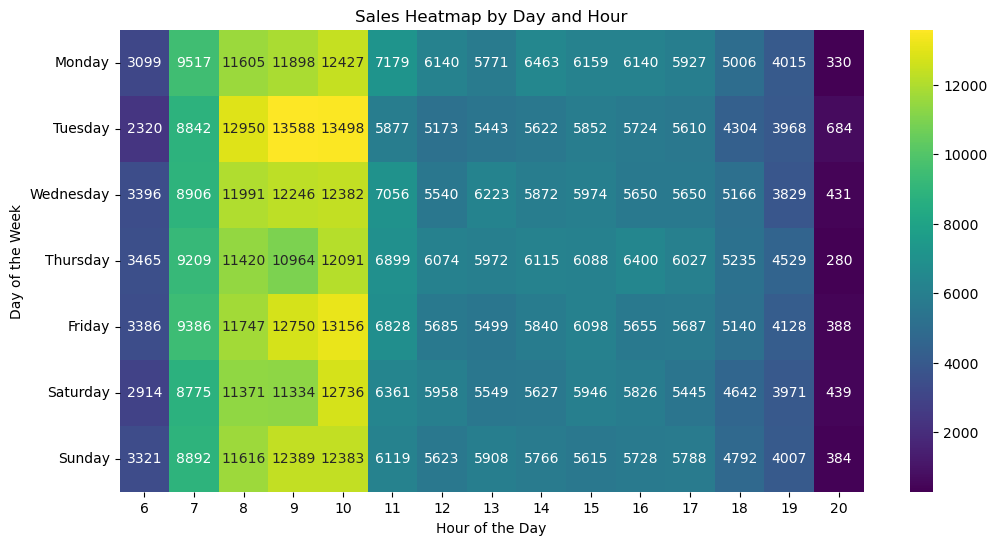

In [22]:
# Plot 9: Sales Heatmap by Day and Hour
pivot_table = data.pivot_table(values='total_sales', index='day', columns='hour', aggfunc='sum')
pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.0f')
plt.title('Sales Heatmap by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

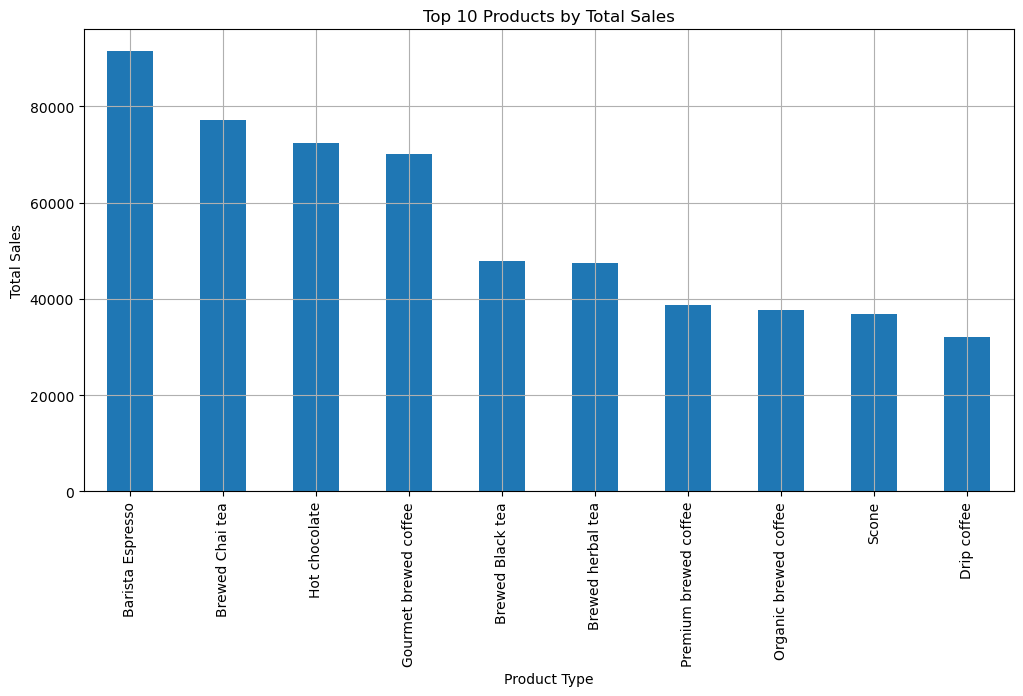

In [23]:
# Plot 10: Top 10 Products by Total Sales
plt.figure(figsize=(12, 6))
top_products = data.groupby('product_type')['total_sales'].sum().nlargest(10)
top_products.plot(kind='bar')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

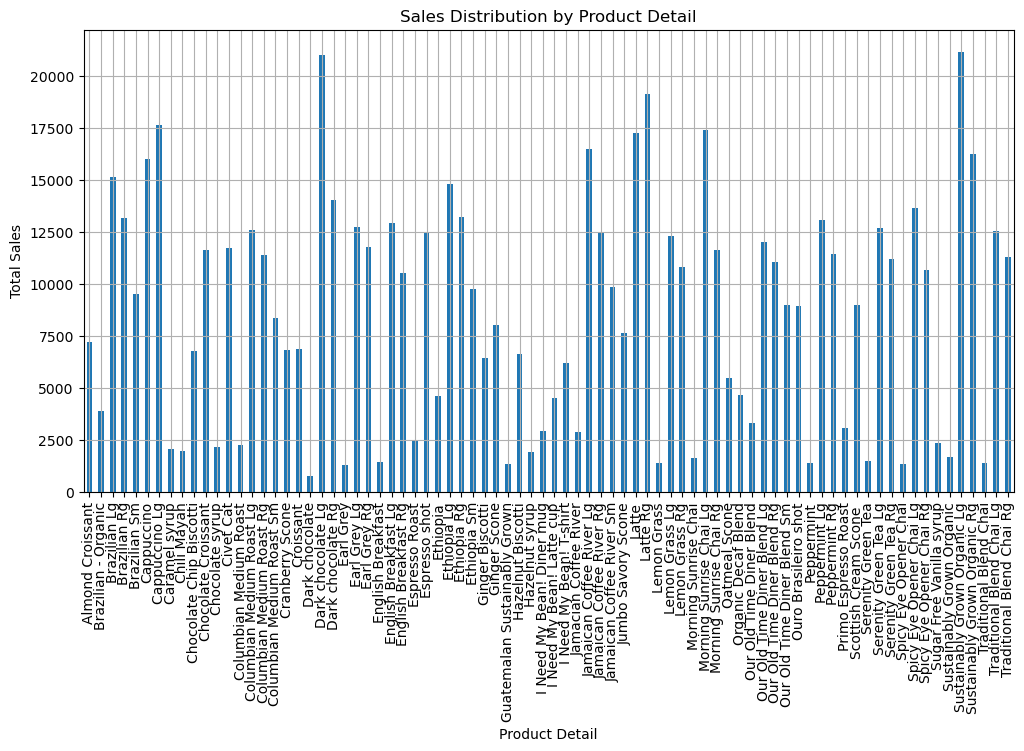

In [24]:
# Plot 11: Sales Distribution by Product Detail
plt.figure(figsize=(12, 6))
data.groupby('product_detail')['total_sales'].sum().plot(kind='bar')
plt.title('Sales Distribution by Product Detail')
plt.xlabel('Product Detail')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

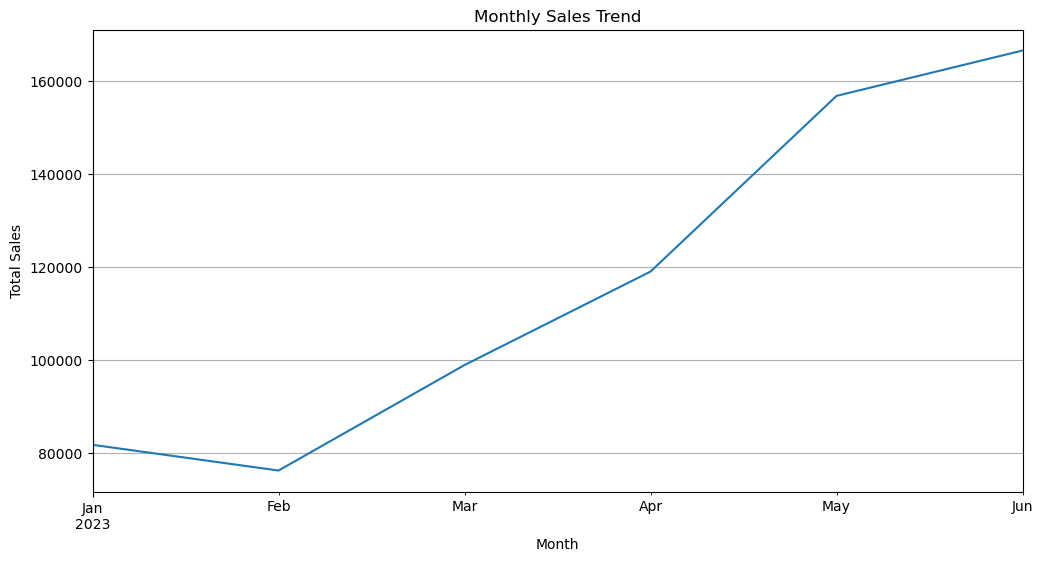

In [25]:
# Plot 13: Monthly Sales Trend
plt.figure(figsize=(12, 6))
data['month'] = data['transaction_date'].dt.to_period('M')
monthly_sales = data.groupby('month')['total_sales'].sum()
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

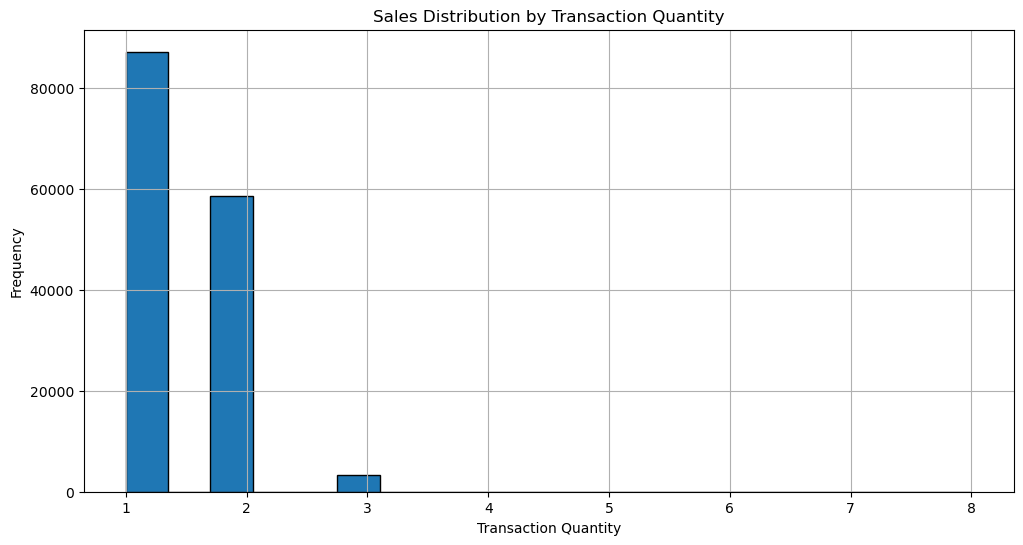

In [26]:
# Plot 15: Sales Distribution by Transaction Quantity
plt.figure(figsize=(12, 6))
data['transaction_qty'].plot(kind='hist', bins=20, edgecolor='k')
plt.title('Sales Distribution by Transaction Quantity')
plt.xlabel('Transaction Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Profit Increase Prediction (if applicable)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
# Example: Adding a 7-day moving average
data['7d_ma_total_sales'] = data.groupby('product_type')['total_sales'].transform(lambda x: x.rolling(window=7).mean())

# Fill missing values after moving average calculation
data.fillna(0, inplace=True)

In [29]:
# Extract month and day of the week from transaction_date
data['month'] = data['transaction_date'].dt.month
data['day'] = data['transaction_date'].dt.weekday

In [30]:
# Select features and target variable
features = ['transaction_qty', 'unit_price', 'year', 'month', 'day', 'hour', '7d_ma_total_sales']
X = data[features]
y = data['total_sales']

In [31]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict future profits
y_pred = model.predict(X_test)

In [34]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.0730991091773427


In [35]:
# Analyzing model coefficients to understand the impact of each product on profitability
coefficients = pd.DataFrame(model.coef_, index=features, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

# Display top features contributing to profit increase
print("Top Features Contributing to Profit Increase:")
print(coefficients.head())

# Identifying key products by aggregating total sales
total_sales_by_product = data.groupby('product_type')['total_sales'].sum().sort_values(ascending=False)
top_products = total_sales_by_product.head(5).index.tolist()

print("Top Products Contributing to Profit Increase:")
print(total_sales_by_product.head())

# Recommendations
recommendations = """
To increase profit margins, focus on the following strategies:
1. **Increase Promotion and Marketing**: Focus on promoting top products such as {}.
2. **Optimize Pricing**: Evaluate and adjust the pricing strategy for high-impact products.
3. **Inventory Management**: Ensure sufficient stock for high-demand products to avoid stockouts.
4. **Customer Feedback**: Gather customer feedback on top products to further enhance their appeal.
5. **Cross-Selling**: Bundle top products with other items to increase sales volume.

By implementing these strategies, you can effectively enhance profitability and maximize revenue growth.
""".format(", ".join(top_products))

print(recommendations)

Top Features Contributing to Profit Increase:
                    Coefficient
transaction_qty    3.198613e+00
unit_price         7.459740e-01
7d_ma_total_sales  4.725022e-01
hour               1.074228e-03
year              -5.551115e-16
Top Products Contributing to Profit Increase:
product_type
Barista Espresso         91406.20
Brewed Chai tea          77081.95
Hot chocolate            72416.00
Gourmet brewed coffee    70034.60
Brewed Black tea         47932.00
Name: total_sales, dtype: float64

To increase profit margins, focus on the following strategies:
1. **Increase Promotion and Marketing**: Focus on promoting top products such as Barista Espresso, Brewed Chai tea, Hot chocolate, Gourmet brewed coffee, Brewed Black tea.
2. **Optimize Pricing**: Evaluate and adjust the pricing strategy for high-impact products.
3. **Inventory Management**: Ensure sufficient stock for high-demand products to avoid stockouts.
4. **Customer Feedback**: Gather customer feedback on top products to fur

In [36]:
import statsmodels.api as sm
# Check the column names to find the correct date column name
print(data.columns)


Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'month', 'day', 'year', 'hour', 'total_sales', '7d_ma_total_sales'],
      dtype='object')


# IMPLEMENTING Model

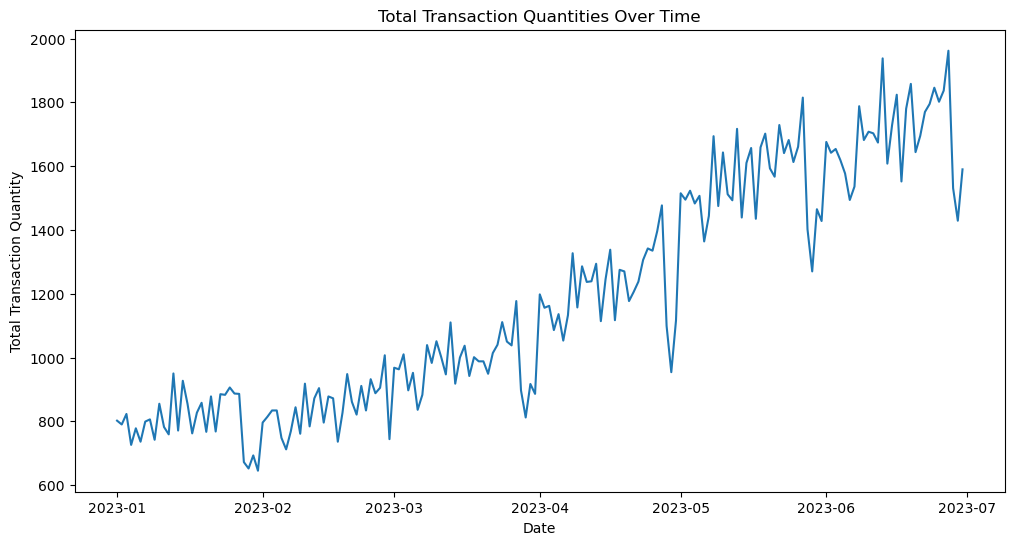

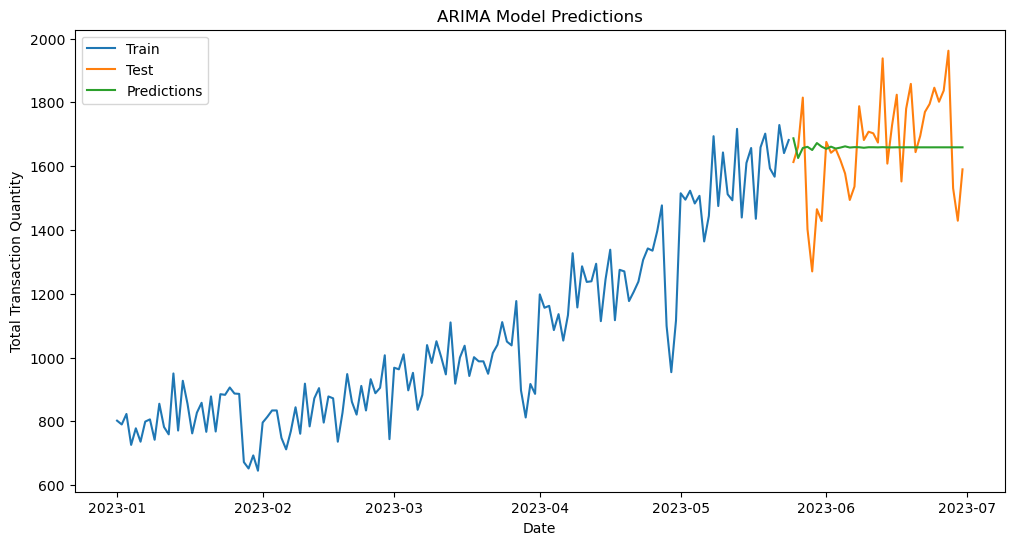

Mean Squared Error: 23714.081377298207


In [41]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'path_to_your_file/cleaned_data.csv'  # Update this path
data = pd.read_csv('cleaned_data.csv')

# Parse dates and set the index
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data.set_index('transaction_date', inplace=True)

# Aggregate data to create a time series of total transaction quantities by date
ts = data.resample('D').sum()['transaction_qty']

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title('Total Transaction Quantities Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Quantity')
plt.show()

# Split the data into train and test sets
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Update the order as needed
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))
predictions = pd.Series(predictions, index=test.index)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Total Transaction Quantity')
plt.legend()
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')
